In [45]:
import pandas as pd
import seaborn as sns
from package_ml.get_data import Data
from package_ml.preprocessing import Preprocessing
from package_ml.model import Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# prepro

In [2]:
do = Data('titanic') 

In [3]:
titanic_data = do.get_data()

In [4]:
preproc = Preprocessing(titanic_data)

In [5]:
preproc.drop('Cabin')

In [6]:
preproc.mean_inputer('Age')

In [7]:
preproc.mode_inputer('Embarked')

In [8]:
preproc.encoding('Sex','Embarked')

In [9]:
titanic_data = preproc.final_df()

In [10]:
titanic_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

# model

In [11]:
ml = Model(titanic_data)

In [12]:
X = ml.X_features_drop(['PassengerId','Name','Ticket','Survived'])

In [13]:
X.shape

(891, 7)

In [14]:
y = ml.y_target(['Survived'])

In [15]:
X_train, X_test, y_train, y_test = ml.split(X,y,test_size=0.2,random_state=2)

In [16]:
X_train.shape, y_train.shape

((712, 7), (712, 1))

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
X_train_prediction = model.predict(X_train)

training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of training data :  0.8075842696629213
Accuracy score of test data :  0.7821229050279329


In [19]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [20]:
ml.prediction(model = model ,pclass = 3, sex=0, age=35, sibsp=0, parch=0, fare=8.05, embarked=0)

'Dead'

In [21]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,0,42.000000,0,0,26.2875,0
37,3,0,21.000000,0,0,8.0500,0
615,2,1,24.000000,1,2,65.0000,0
169,3,0,28.000000,0,0,56.4958,0
68,3,1,17.000000,4,2,7.9250,0
...,...,...,...,...,...,...,...
89,3,0,24.000000,0,0,8.0500,0
80,3,0,22.000000,0,0,9.0000,0
846,3,0,29.699118,8,2,69.5500,0
870,3,0,26.000000,0,0,7.8958,0


In [22]:
model.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [23]:
y_test.shape, X_test.shape

((179, 1), (179, 7))

In [24]:
X.shape, y.shape

((891, 7), (891, 1))

# Visualisation

In [25]:
# répartition des survivants par sexe

f_v = 0
f_m = 0
h_v = 0
h_m = 0
for features, target in zip(X.values, y.values):
    if int(features[1]) == 1 and target[0] == 1:
        f_v += 1
    elif int(features[1]) == 1 and target[0] == 0:
        f_m += 1
    elif int(features[1]) == 0 and target[0] == 1:
        h_v += 1
    elif int(features[1]) == 0 and target[0] == 0:
        h_m += 1
#     print(features[1], target[0])
        
# synthaxe à utiliser pour utilisation en htlm "liste de dict" 
[{"Nombre de femmes ayant survécu":f_v},{"Nombre de femmes n'ayant pas survécu":f_m},{"Nombre d'hommes ayant survécu":h_v},{"Nombre d'hommes n'ayant pas survécu":h_m}]

[{'Nombre de femmes ayant survécu': 233},
 {"Nombre de femmes n'ayant pas survécu": 81},
 {"Nombre d'hommes ayant survécu": 109},
 {"Nombre d'hommes n'ayant pas survécu": 468}]

In [38]:
# répartition des survivants par pclass

pclass1_v = 0
pclass1_m = 0
pclass2_v = 0
pclass2_m = 0
pclass3_v = 0
pclass3_m = 0

for features, target in zip(X.values, y.values):
    if int(features[0]) == 1 and target[0] == 1:
        pclass1_v += 1
    elif int(features[0]) == 1 and target[0] == 0:
        pclass1_m += 1
    elif int(features[0]) == 2 and target[0] == 1:
        pclass2_v += 1
    elif int(features[0]) == 2 and target[0] == 0:
        pclass2_m += 1
    elif int(features[0]) == 3 and target[0] == 1:
        pclass3_v += 1
    elif int(features[0]) == 3 and target[0] == 0:
        pclass3_m += 1
[{"Nombre de survivants ayant un ticket en 1ère classe":pclass1_v},{"Nombre de morts ayant un ticket en 1ère classe":pclass1_m},
 {"Nombre de survivants ayant un ticket en 2ème classe":pclass2_v},{"Nombre de morts ayant un ticket en 2ème classe":pclass2_m},
{"Nombre de survivants ayant un ticket en 3ème classe":pclass3_v},{"Nombre de morts ayant un ticket en 3ème classe":pclass3_m}]

[{'Nombre de survivants ayant un ticket en 1ère classe': 136},
 {'Nombre de morts ayant un ticket en 1ère classe': 80},
 {'Nombre de survivants ayant un ticket en 2ème classe': 87},
 {'Nombre de morts ayant un ticket en 2ème classe': 97},
 {'Nombre de survivants ayant un ticket en 3ème classe': 119},
 {'Nombre de morts ayant un ticket en 3ème classe': 372}]

In [82]:
features.count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [42]:
X['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

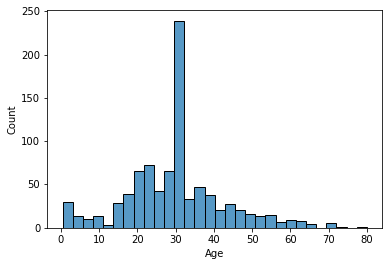

In [50]:
# enfants : 0-10
# adolescents : 10-18
# adultes : 18-50
# personnes âgées : 50 et +
sns.histplot(X['Age'])

In [44]:
X['Age'].min()

0.42

In [73]:
# répartition par tranche d'âge
# test.value_counts()

age = pd.cut(X['Age'], bins = [0, 18, 50, 80])

# child_v = 0
# child_m = 0
# adult_v = 0
# adult_m = 0
# old_v = 0
# old_m = 0

# for age, target in zip(age.values, y.values):
#     if age == 1 and target[0] == 1:
#         child_v += 1
#     elif int(age) == 1 and target[0] == 0:
#         child_m += 1
#     elif int(age) == 2 and target[0] == 1:
#         adult_v += 1
#     elif int(age) == 2 and target[0] == 0:
#         adult_m += 1
#     elif int(age) == 3 and target[0] == 1:
#         old_v += 1
#     elif int(age) == 3 and target[0] == 0:
#         old_m += 1

In [74]:
age.value_counts()

(18, 50]    688
(0, 18]     139
(50, 80]     64
Name: Age, dtype: int64

In [75]:
age.values

[(18, 50], (18, 50], (18, 50], (18, 50], (18, 50], ..., (18, 50], (18, 50], (18, 50], (18, 50], (18, 50]]
Length: 891
Categories (3, interval[int64, right]): [(0, 18] < (18, 50] < (50, 80]]

In [81]:
test_2 = zip(age.values, y.values)

# Visualisation par avec ou sans famille